**INTRODUCTION**
. This Dataset is related to Flight Fare Prediction 
. This Dataset is collected from Makemytrip.com
. Shape of this Dataset is (2121,9)
. In this Dataset have 9 Attributes

1. flight= flight Brand name
2. flight_code= it is model no. of Flight
3. FROM = Airport name, where flight will be take off from 
4. TO = Airport name, where flight will be landing
5. duration= Flight journey time in hourly format 
6. CLASS = economy class, premium class & Business class Flight seats
7. departure_time= in 24 hour format
8. arival_time
9. price = Fare Price of FLight

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows',None)

import warnings
warnings.filterwarnings('ignore')

In [51]:
import re

In [46]:
df=pd.read_csv('flight_price.csv')

In [47]:
df.head()

,Unnamed: 0,flight,flight_code,FROM,TO,departure,duration,arival,Date,CLASS,price
0,0,SpiceJet,SG 8251,New Delhi,Kolkata,18:50,02 h 10 m,21:00,24-09-2022,economy,"₹ 5,948"
1,1,SpiceJet,SG 8254,New Delhi,Kolkata,20:10,02 h 25 m,22:35,24-09-2022,economy,"₹ 5,948"
2,2,IndiGo,6E 5219,New Delhi,Kolkata,07:10,02 h 10 m,09:20,24-09-2022,economy,"₹ 5,954"
3,3,IndiGo,6E 6005,New Delhi,Kolkata,22:20,01 h 55 m,00:15,24-09-2022,economy,"₹ 5,954"
4,4,Air India,AI 401,New Delhi,Kolkata,06:50,02 h 10 m,09:00,24-09-2022,economy,"₹ 5,955"


LET'S CLEAN THE DATA

In [48]:
# dropped the index column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [59]:
df.shape

(2134, 10)

In [88]:
#
df.isnull().sum()         # in this dataset has null value in a rows

flight         0
flight_code    0
FROM           1
TO             1
departure      1
duration       1
arival         1
Date           0
CLASS          0
price          0
dtype: int64

In [98]:

df.loc[208,'FROM'] = 'New Delhi'           # fill nan value of 'FROM' column
df.loc[208,'TO'] = 'Mumbai'               # fill nan value of 'TO' column
df.loc[208, 'departure']= '06:30'        # 
df.loc[208, 'duration']= '16 h 40 m'      # we checked new delhi to mumbai average duration
df.loc[208, 'arival']= '23:10'           # 

In [99]:
# CHECKING NULL VALUE 
df.isnull().sum()

flight         0
flight_code    0
FROM           0
TO             0
departure      0
duration       0
arival         0
Date           0
CLASS          0
price          0
dtype: int64

In [62]:

# convert  'Date' feature datatype into datetime format
df['Date']= pd.to_datetime(df['Date'])

C:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24-09-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)


In [61]:

# cleaning the 'price' feature data
price= []
for i in df['price']:
    price.append(''.join(re.findall('[0-9]', i)))
len(price)

2134

In [113]:
#         clean the 'duration' column data 
duration= []
for i in df['duration']:
    if len(str(i).split(' '))== 4:
        duration.append(i.split(' ')[0]+'.'+i.split(' ')[2])
    if len(str(i).split(' '))== 2:
        duration.append(i.split(' ')[0]+'.'+str(0))
len(duration)

2134

In [133]:
# 
departure_time = [('.'.join(i.split(':'))) for i in df['departure']]
print(len(departure_time))

arival_time = [('.'.join(i.split(':'))) for i in df['arival']]
print(len(arival_time))

#
flight_code= [(''.join(i.split(','))) for i in df['flight_code']]
print(len(flight_code))

2134
2134
2134


In [134]:
# ADD THE NEW CLEAN COLUMNS 
df['price']= price
df['duration']= duration
df['departure_time'] = departure_time
df['arival_time'] = arival_time
df['flight_code']= flight_code

In [136]:
df=df.drop(['departure','arival'], axis=1)

In [137]:
df.head()

,flight,flight_code,FROM,TO,duration,Date,CLASS,price,departure_time,arival_time
0,SpiceJet,SG 8251,New Delhi,Kolkata,02.10,2022-09-24,economy,5948,18.50,21.00
1,SpiceJet,SG 8254,New Delhi,Kolkata,02.25,2022-09-24,economy,5948,20.10,22.35
2,IndiGo,6E 5219,New Delhi,Kolkata,02.10,2022-09-24,economy,5954,07.10,09.20
3,IndiGo,6E 6005,New Delhi,Kolkata,01.55,2022-09-24,economy,5954,22.20,00.15
4,Air India,AI 401,New Delhi,Kolkata,02.10,2022-09-24,economy,5955,06.50,09.00


In [138]:

df.isnull().sum()

flight            0
flight_code       0
FROM              0
TO                0
duration          0
Date              0
CLASS             0
price             0
departure_time    0
arival_time       0
dtype: int64

In [139]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight          2134 non-null   object        
 1   flight_code     2134 non-null   object        
 2   FROM            2134 non-null   object        
 3   TO              2134 non-null   object        
 4   duration        2134 non-null   object        
 5   Date            2134 non-null   datetime64[ns]
 6   CLASS           2134 non-null   object        
 7   price           2134 non-null   object        
 8   departure_time  2134 non-null   object        
 9   arival_time     2134 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 166.8+ KB


In [143]:
# 
df['price']= df['price'].astype('int')
df['duration']= df['duration'].astype('float')
df['departure_time']= df['departure_time'].astype('float')
df['arival_time']= df['arival_time'].astype('float')



# LET'S START THE EDA ON THIS DATASET

In [3]:

df= pd.read_csv('FLIGHT_PRICE.CSV')

In [4]:
df.head()

,flight,flight_code,FROM,TO,duration,Date,CLASS,price,departure_time,arival_time
0,SpiceJet,SG 8251,New Delhi,Kolkata,2.10,2022-09-24,economy,5948,18.5,21.00
1,SpiceJet,SG 8254,New Delhi,Kolkata,2.25,2022-09-24,economy,5948,20.1,22.35
2,IndiGo,6E 5219,New Delhi,Kolkata,2.10,2022-09-24,economy,5954,7.1,9.20
3,IndiGo,6E 6005,New Delhi,Kolkata,1.55,2022-09-24,economy,5954,22.2,0.15
4,Air India,AI 401,New Delhi,Kolkata,2.10,2022-09-24,economy,5955,6.5,9.00


In [4]:
# let's check the dataset shape
df.shape

(2121, 10)

In [7]:
df.isnull().sum() # checking null value in dataset

flight            0
flight_code       0
FROM              0
TO                0
duration          0
Date              0
CLASS             0
price             0
departure_time    0
arival_time       0
dtype: int64

In [8]:

df.info()      # brief summary about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight          2134 non-null   object 
 1   flight_code     2134 non-null   object 
 2   FROM            2134 non-null   object 
 3   TO              2134 non-null   object 
 4   duration        2134 non-null   float64
 5   Date            2134 non-null   object 
 6   CLASS           2134 non-null   object 
 7   price           2134 non-null   int64  
 8   departure_time  2134 non-null   float64
 9   arival_time     2134 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 166.8+ KB


In [53]:
# STATISTICAL DESCRIPTION
df.describe()
# Minimum fare price is 2000 and Maximum is 68433
# 75 percent fare price data point distributed between 2000 to 12000

,flight,duration,CLASS,price,departure_time,arival_time
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,15.308817,5.284088,1.270156,11241.778406,12.982980,14.357025
std,2.161927,4.472374,0.606646,9257.157472,5.957736,6.144446
min,1.000000,1.000000,1.000000,2000.000000,0.100000,0.050000
25%,15.000000,2.150000,1.000000,6290.000000,7.400000,9.350000
50%,16.000000,3.400000,1.000000,8609.000000,13.200000,15.050000
75%,16.000000,7.350000,1.000000,11984.000000,18.250000,19.500000
max,17.000000,28.050000,3.000000,68433.000000,23.550000,23.550000


In [57]:
# let's check how much datapoint distributed within less 20000 and greater than 50000

print('original shape=', df.shape)
print(df[df['price']<=20000].shape)
print(df[df['price']>=50000].shape)

# we can that less than 2 percent of price datapoint have spread above 50000
# about 90 percent of price datapoints have distributed less than or equal to 20000 

original shape= (2121, 10)
(1929, 10)
(37, 10)


In [11]:
# 'flight_code' is categorical attribute and in this 1317 different value
df['flight_code'].value_counts()

# if we use one-hot-encoding or get_dummies method on this attribute than dataset attributes size more than 1320
#  and we could build a model with keeping its and after again remove this attributes from dataset and then build a model so 
 in r2_score no shown any differences

UK 963           5
UK 995           5
UK 943           5
UK 737           5
UK 707           5
                ..
UK 802 UK 643    1
UK 816 UK 643    1
UK 818 UK 643    1
UK 820 UK 643    1
AI 616 AI 673    1
Name: flight_code, Length: 1317, dtype: int64

<AxesSubplot:>

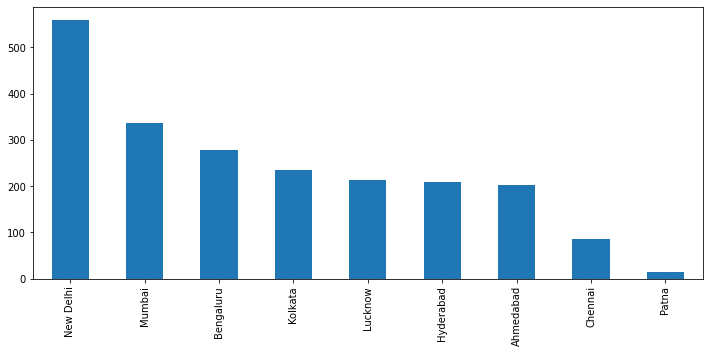

In [9]:

# BARPLOT OF DEPARTURE FROM 
df['FROM'].value_counts().plot(kind='bar', figsize=(12,5))

<AxesSubplot:>

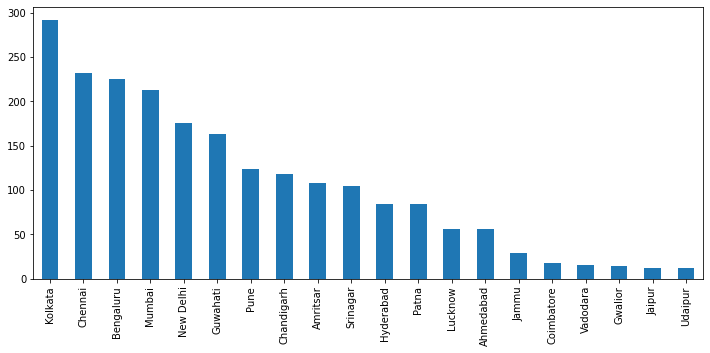

In [151]:
#  plotting barplot 'TO'= means Flight where about going to landing 
df['TO'].value_counts().plot(kind='bar', figsize=(12,5))

<AxesSubplot:xlabel='TO'>

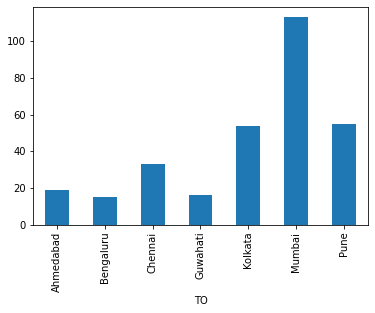

In [23]:
# LETS CHECK ON WHICH AIRPORT WERE DEPARTED MOST OF FLIGHT FROM NEW DELHI ON 24 SEPTEMBER = MUMBAI, 

df[(df['Date']=='2022-09-24') & (df['FROM']=='New Delhi')].groupby(['TO'])['flight'].count().plot(kind='bar')

<AxesSubplot:>

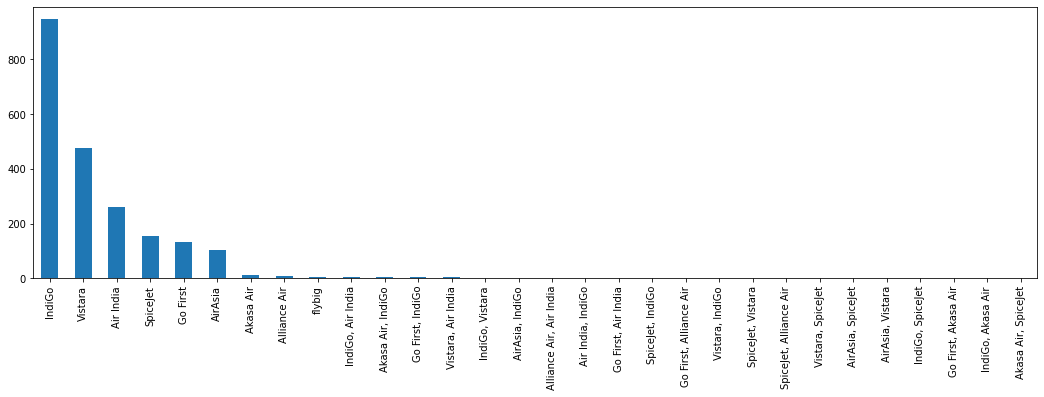

In [155]:
## LET'S CHECK WHICH COMPANY'S FLIGHT HAVE MORE TAKE-OFF FROM ALL THE AIRPORT 

df['flight'].value_counts().plot(kind='bar', figsize=(18,5))

# INDIGO,VISTARA, AIR-INDIA,SPICEJET AND AIRASIA THESE ARE MOST TIME TAKEOFF FROM ALL THE AIRPORT 
# INDIGO FIRST POSITION, VISTARA SECOND POSITION,AIR-INDIA THIRD POSITION

In [10]:
df['CLASS'].value_counts()

economy      1667
premium       206
business      172
 economy       75
 business       9
 premium        5
Name: CLASS, dtype: int64

In [4]:
#
df['CLASS'].replace({' premium':'premium',' business':'business',' economy':'economy'}, inplace=True)

<AxesSubplot:>

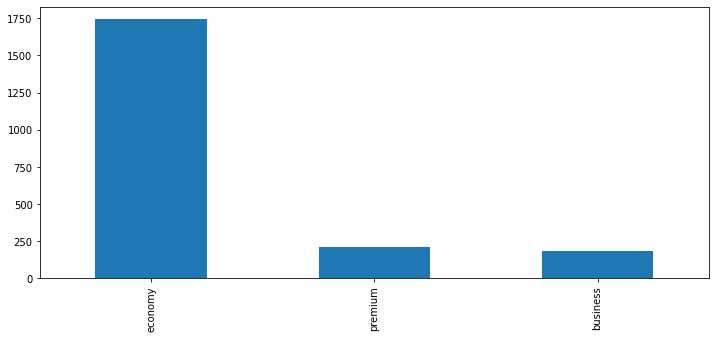

In [12]:

df['CLASS'].value_counts().plot(kind='bar',figsize=(12,5))

# IN THIS DATASET HAS LESS NUMBER OF 'PREMIUM','BUSINESS' VALUE IN 'CLASS' ATRRIBUTE

<AxesSubplot:xlabel='CLASS', ylabel='price'>

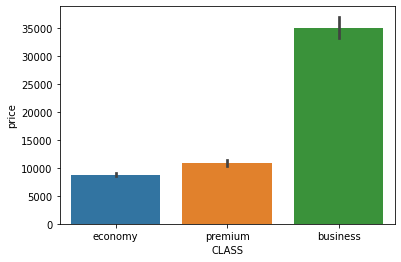

In [36]:
# plotting barplot of CLASS attribute with price
sns.barplot(df['CLASS'], df['price'])

# business class has highest Flight fare price

<AxesSubplot:xlabel='flight,TO'>

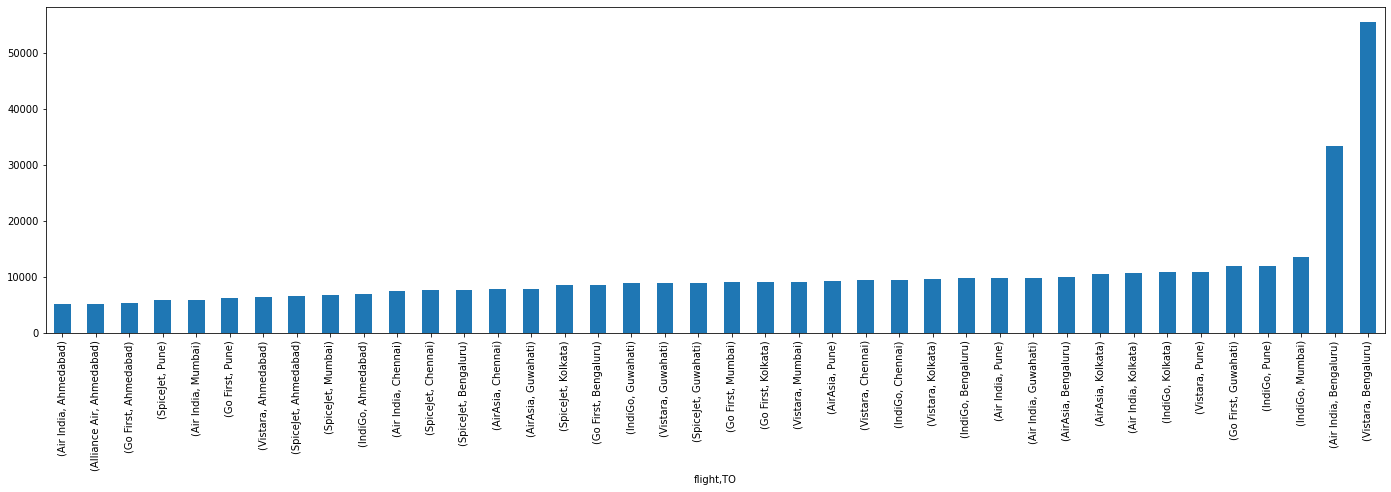

In [27]:

# Let's find Which Flight has highest fare price from New Delhi in Economy Class according to groupby(TO) attribute

df[(df['FROM']=='New Delhi') & (df['CLASS']=='economy')].groupby(['flight','TO'])['price'].max().sort_values().plot(
    kind='bar', figsize=(24,6))

#  Vistara, Air India, Indigo,Go First These flights are highest fare price compare to another flights and Vistara 1st position    

<AxesSubplot:xlabel='flight,TO'>

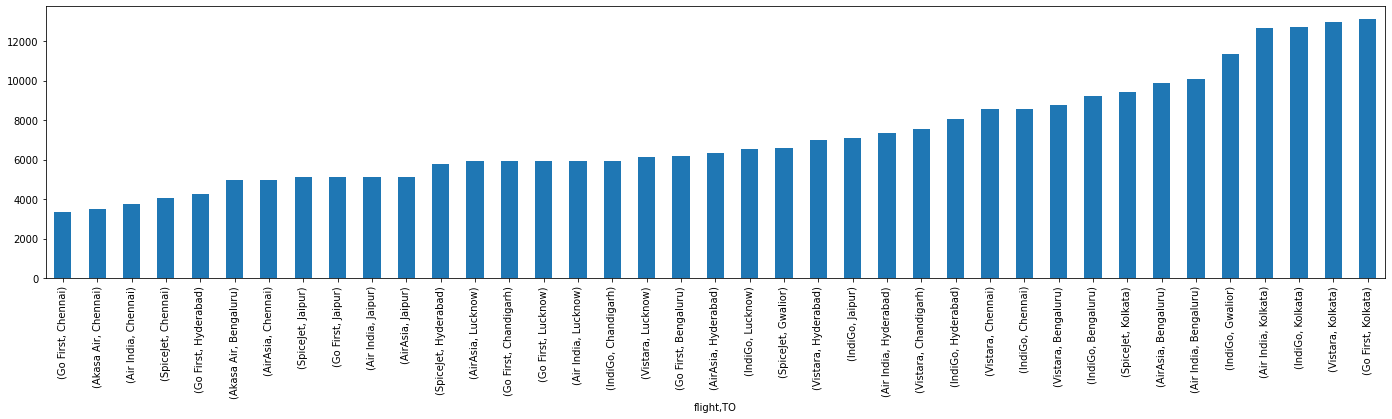

In [31]:

## Let's find Which Flight has highest fare price from MUMBAI in Economy Class according to groupby(TO) attribute


df[(df['FROM']=='Mumbai') & (df['CLASS']=='economy')].groupby(['flight','TO'])['price'].max().sort_values().plot(
    kind='bar', figsize=(24,5))
# Go First, Vistara, Indigo, Air india

<AxesSubplot:xlabel='flight,TO'>

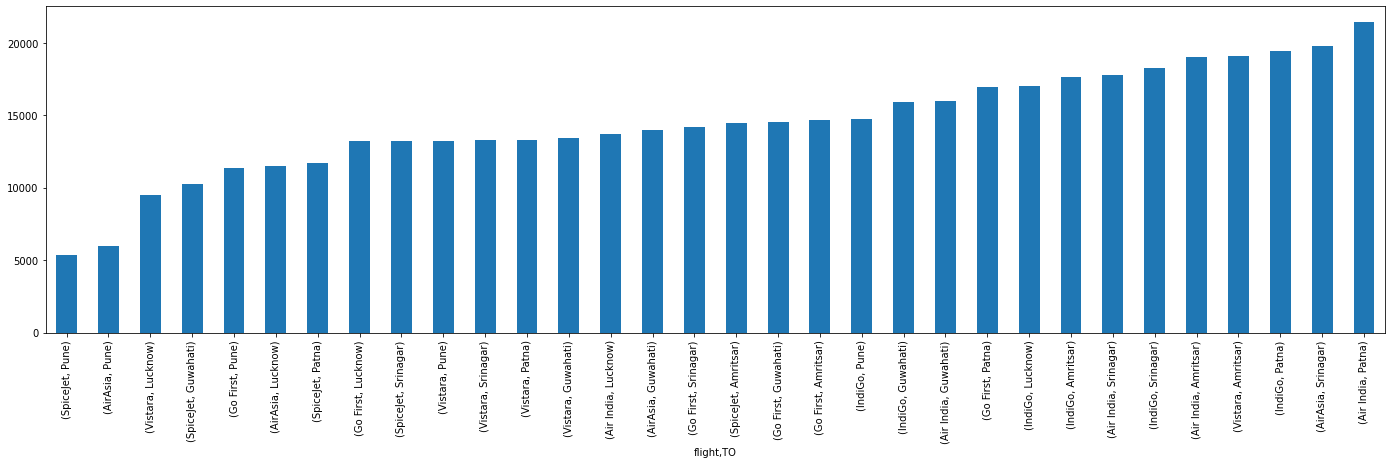

In [32]:
# ## Let's find Which Flight has highest fare price from BENGALURU in Economy Class according to groupby(TO) attribute

df[(df['FROM']=='Bengaluru') & (df['CLASS']=='economy')].groupby(['flight','TO'])['price'].max().sort_values().plot(
    kind='bar', figsize=(24,6))
Air India,AirAsia,Indigo,Vistara

<AxesSubplot:xlabel='flight,FROM,TO'>

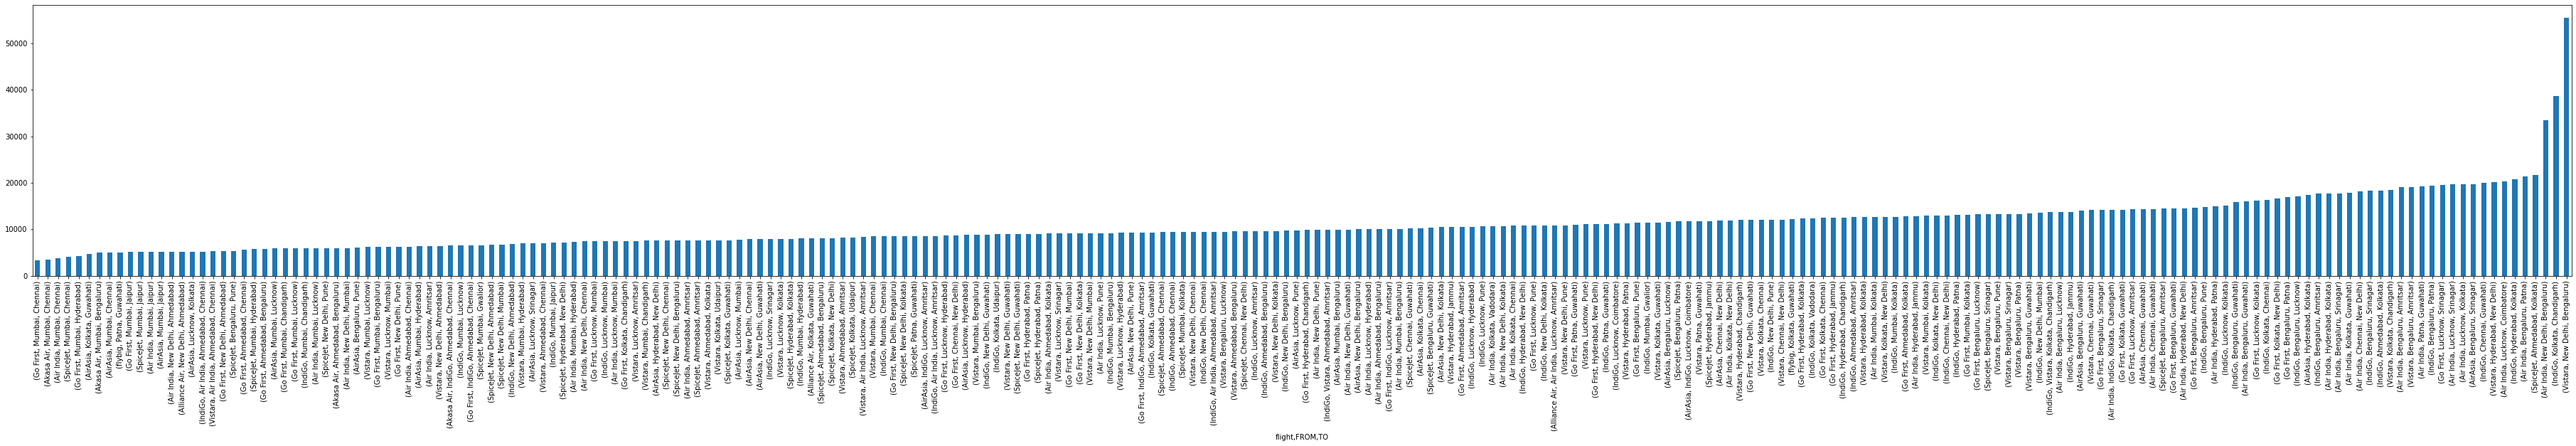

In [76]:
# let's find highest fare price of that Flight which fare price has highest compare to another Flight in each journey 
#   BY PLOTTING (flight,FROM,TO) by groupby method with price 

df[df['CLASS']=='economy'].groupby(['flight','FROM','TO'])['price'].max().sort_values().plot(kind='bar',figsize=(64,7))

# VISTARA 1st, INDIGO 2nd


<AxesSubplot:xlabel='flight,FROM,TO'>

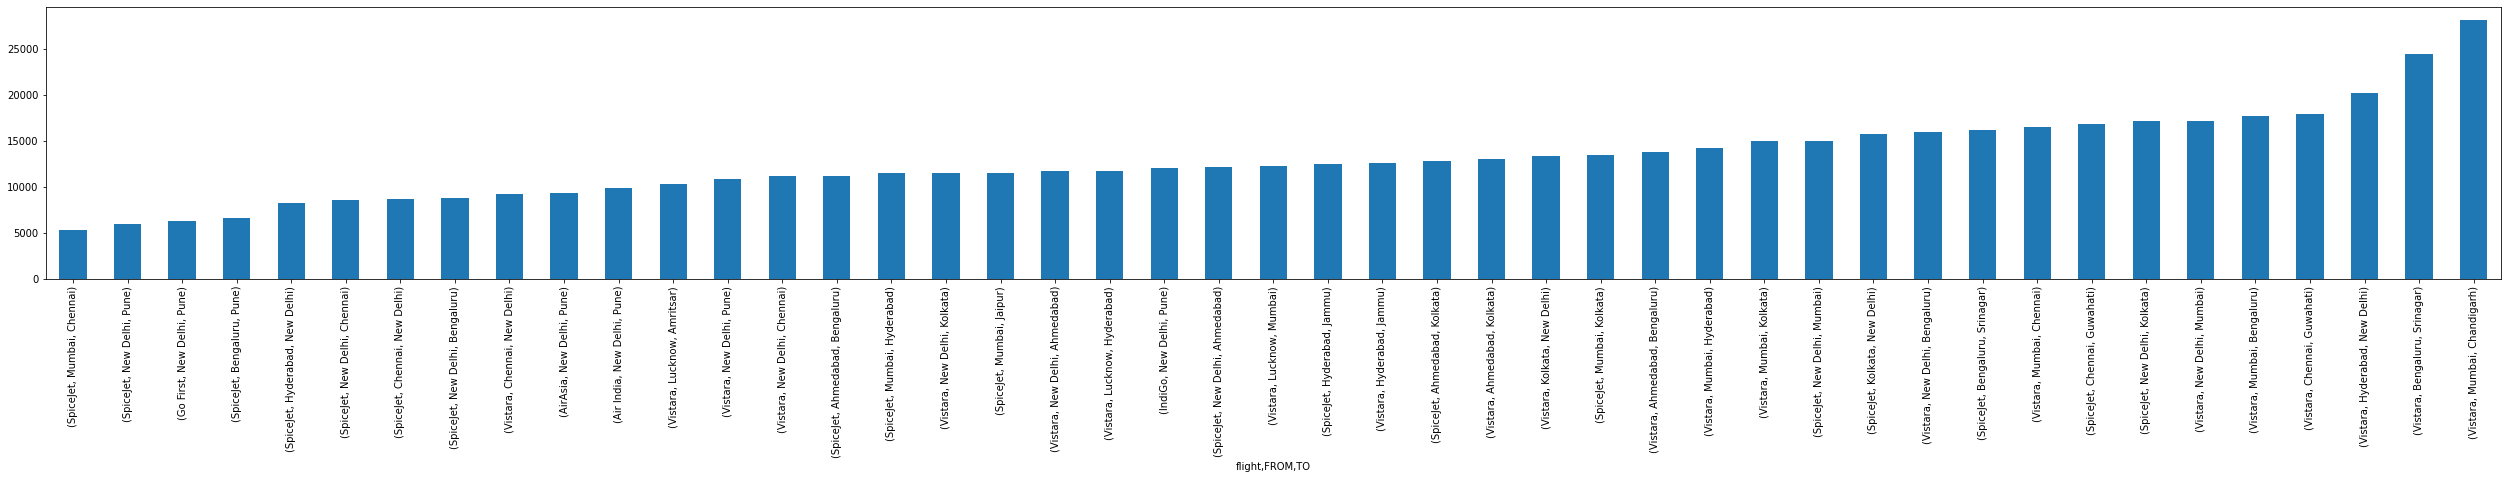

In [77]:

# Let's check that fare price of flight's premium CLASS that which FLIGHT have maximum price

df[df['CLASS']=='premium'].groupby(['flight','FROM','TO'])['price'].max().sort_values().plot(kind='bar',figsize=(44,5))

<AxesSubplot:xlabel='flight'>

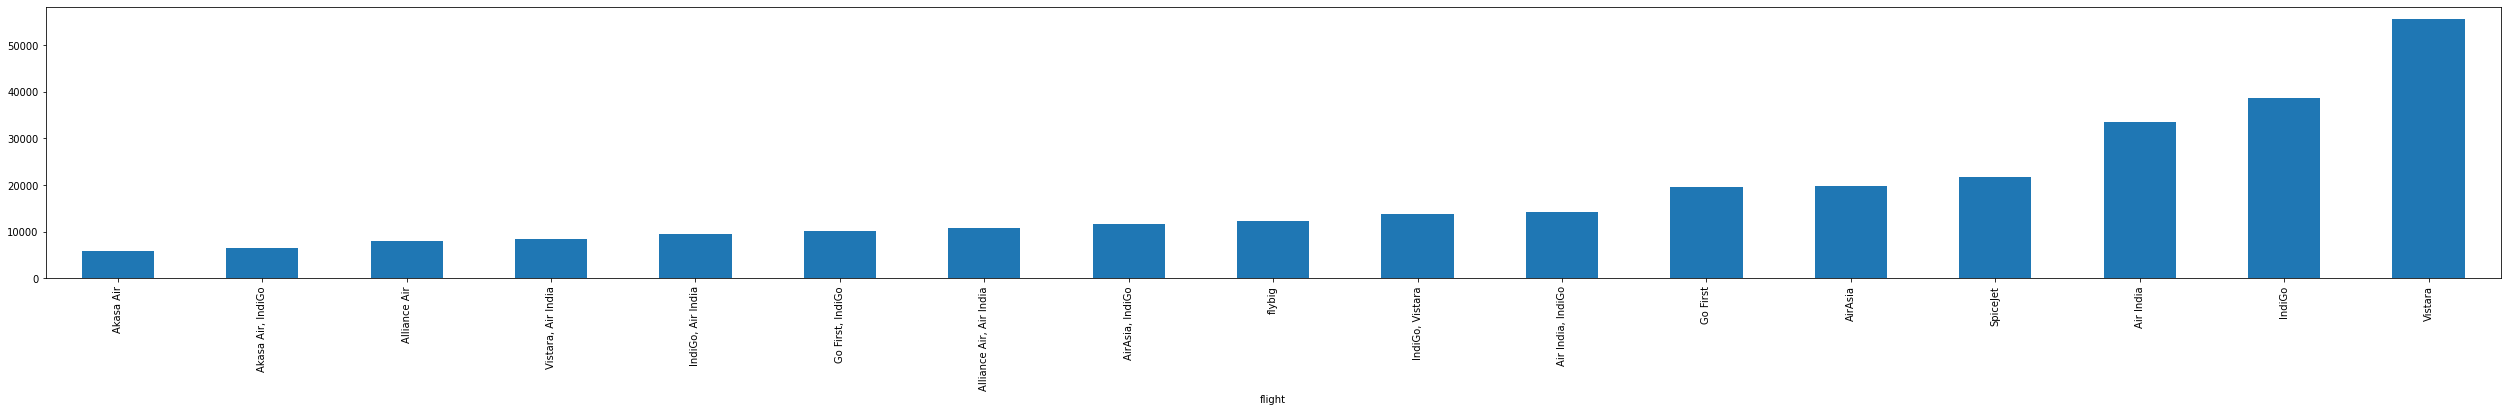

In [6]:
# 
# let's check in 'economy' value of 'CLASS' attribute to which flight fare price has highest

df[df['CLASS']=='economy'].groupby(['flight'])['price'].max().sort_values().plot(kind='bar',figsize=(44,5))

In [ ]:
**ACCORDING TO EDA**
Vistara Flight has more fare price compare to another 
we can use label-encode on Flight Attributes accorading visualization(barplot) 
maximum fare price of Business class seat in Flights  
New Delhi,Mumbai, Chennai, Bengaluru,Ahemadabad from these international airport most of Flight take off 
 to another domestic airport
There are only two categorical columns in this Dataset on which label-encoding can be used, Flight and CLASS  


In [5]:
# we changed these attributes variables according EDA visualization , shown above 

df['CLASS'].replace({'economy':1,'premium':2,'business':3}, inplace=True)

#
df['flight'].replace({'Vistara':17,'IndiGo':16,'Air India':15,'SpiceJet':14,'AirAsia':13,'Go First':12,'Air India, IndiGo':11,
                      'IndiGo, Vistara':10,'flybig':9,'AirAsia, IndiGo':8,'Alliance Air, Air India':7,'Go First, IndiGo':6,
                      'IndiGo, Air India':5,'Vistara, Air India':4,'Alliance Air':3,'Akasa Air, IndiGo':2,'Akasa Air':1}, inplace=True)

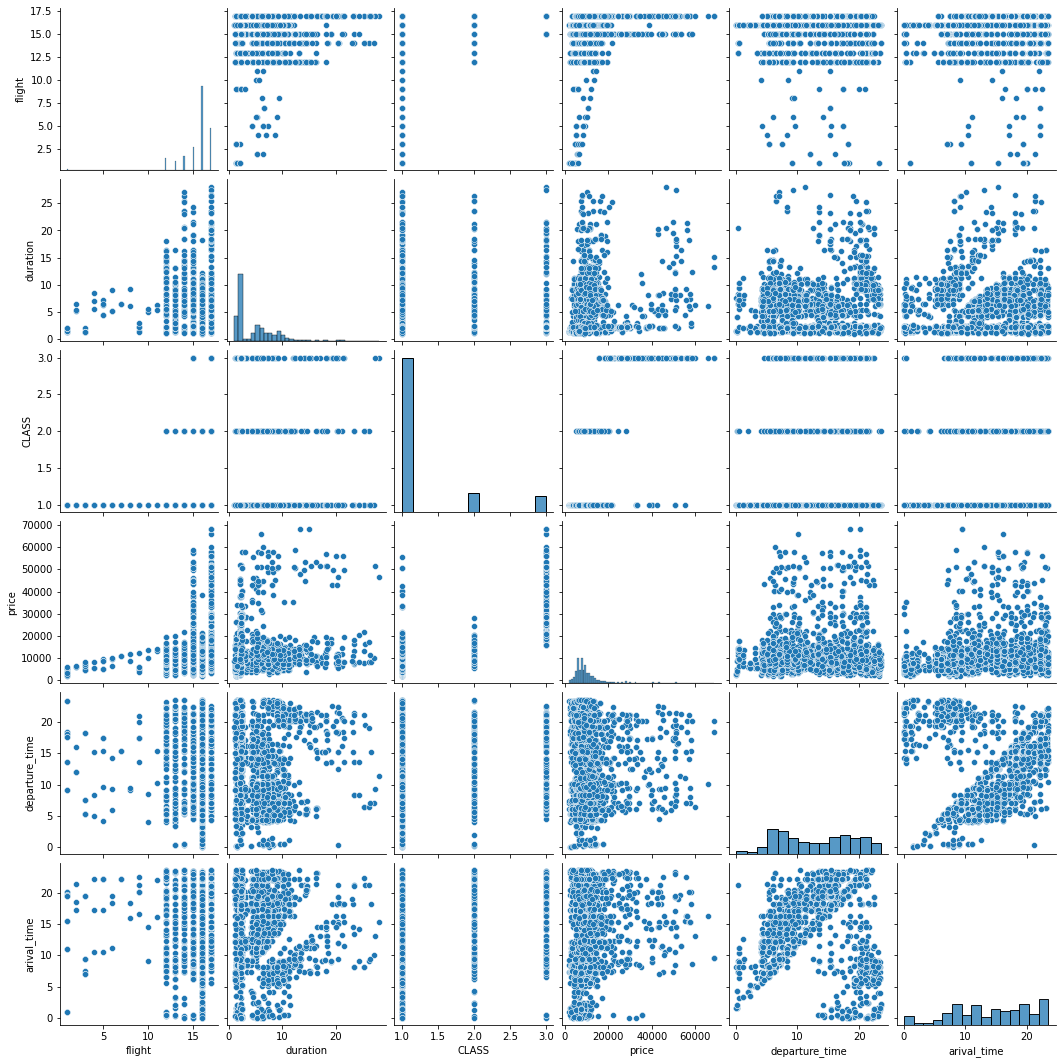

In [41]:
# PLOTTING PAIRPLOT
sns.pairplot(df)

# ACCORADING PAIRPLOT NONE OF ATTRIBUTES HAS A GOOD POSITIVE CORRELATED WITH TARGET  INT HIS DATASET 

<AxesSubplot:>

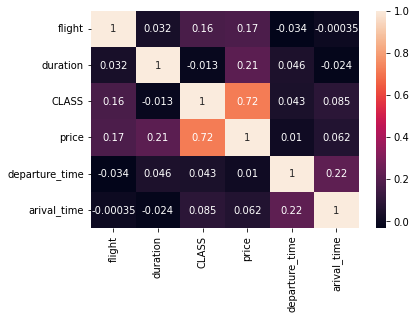

In [59]:
 # PLOTTING CORRELATION PLOT
    
sns.heatmap(df.corr(), annot=True)

# CLASS attribute more positive correlated with price and duration, flight these attributes are less positive
#  correlated with price
# if the Dataset has a Target continuous value and positively correlated attributes are more in such a Dataset, 
#   then we are more likely to get more accuracy.

<AxesSubplot:xlabel='price', ylabel='duration'>

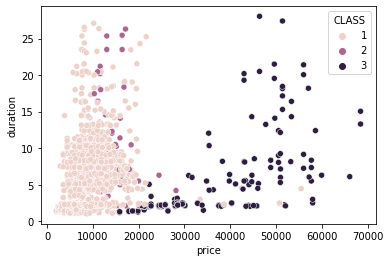

In [61]:
# plotting scatterplot 'price' vs 'duration'
sns.scatterplot( df['price'],df['duration'],hue=df['CLASS'])

<AxesSubplot:xlabel='departure_time', ylabel='Density'>

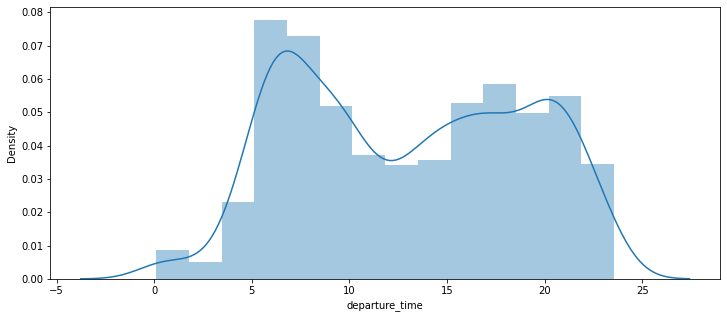

In [64]:
# LET'S CHECK THAT IN WHICH TIME INTERVAL HAS MOST OF FLIGHT TAKE OFF 
plt.figure(figsize=(12,5))
sns.distplot(df['departure_time'],)

# maximum Flight take-off time interval is 5am to 12pm

<AxesSubplot:xlabel='duration', ylabel='Density'>

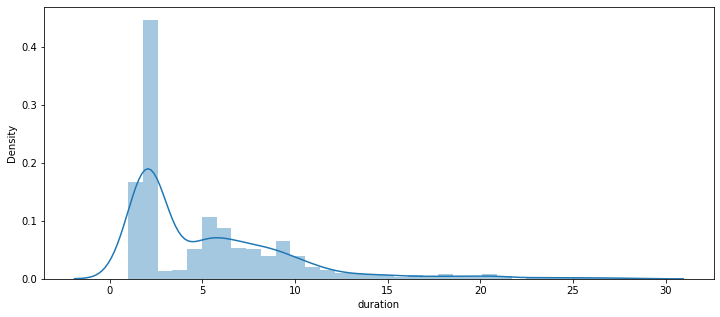

In [65]:
# PLOTTING DISTRIBUTION PLOT OF 'duration'   

plt.figure(figsize=(12,5))
sns.distplot(df['duration'])

# this distribution showing above 80 percent datapoints of 'duration' distributed less than 10 hour

<AxesSubplot:xlabel='price', ylabel='Density'>

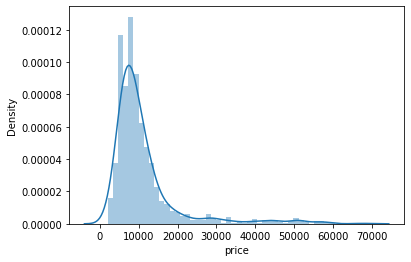

In [42]:
# plotting distribution plot of 'price'
sns.distplot(df['price'])

In [ ]:
# According using describe and distribution plot, in 'duration' attributes is somewhat skewed


In [6]:
# LET'S CHECK SKEWNESS  of continuous columns

df[['duration','departure_time','arival_time']].skew()

# There is skewness in one attributes

duration          1.846728
departure_time    0.023493
arival_time      -0.379305
dtype: float64

In [7]:
df['duration']= np.log1p(df['duration'])
df['duration'].skew()

0.5076388382669668

<AxesSubplot:xlabel='duration'>

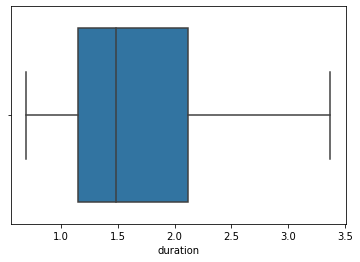

In [8]:

# LET'S CHECK OUTLIERS BY PLOTTING BOXPLOT 

sns.boxplot(df['duration'])
# boxplot showing some outliers in this attributes 
# but we don't remove these datapoint because data is not enough

In [9]:
# Once the 'flight_code' with data was trained & test the model but the accuracy came down after that I droped the
#  'flight_code' attributes and then trained & testing the model on datathen the accuracy was came more than before
df1= df.drop(['flight_code','Date'], axis=1)

In [10]:
df1= pd.get_dummies(df1)

In [11]:
df1.columns

Index(['flight', 'duration', 'CLASS', 'price', 'departure_time', 'arival_time',
       'FROM_Ahmedabad', 'FROM_Bengaluru', 'FROM_Chennai', 'FROM_Hyderabad',
       'FROM_Kolkata', 'FROM_Lucknow', 'FROM_Mumbai', 'FROM_New Delhi',
       'FROM_Patna', 'TO_Ahmedabad', 'TO_Amritsar', 'TO_Bengaluru',
       'TO_Chandigarh', 'TO_Chennai', 'TO_Coimbatore', 'TO_Guwahati',
       'TO_Gwalior', 'TO_Hyderabad', 'TO_Jaipur', 'TO_Jammu', 'TO_Kolkata',
       'TO_Lucknow', 'TO_Mumbai', 'TO_New Delhi', 'TO_Patna', 'TO_Pune',
       'TO_Srinagar', 'TO_Udaipur', 'TO_Vadodara'],
      dtype='object')

In [12]:
x= df1.drop('price', axis=1)
y= df1.price


LET'S TRAIN THE MODEL

In [13]:
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.metrics import *

In [14]:
sc= StandardScaler()
scaled= sc.fit_transform(x)

In [15]:
# Split the dataset into train and test
x_train,x_test,y_train,y_test= train_test_split(scaled,y, test_size=0.20, random_state=59)

In [27]:
## LET'S TRAIN THE MODEL WITH KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors=6,p=4)
knn.fit(x_train,y_train)
k_pred= knn.predict(x_test)
print('r2_score=',r2_score(y_test,k_pred))
print('mean_absolute_error=',mean_absolute_error(y_test,k_pred))
print('mean_squared_error=',mean_squared_error(y_test,k_pred))


r2_score= 0.804809207593372
mean_absolute_error= 2576.00431372549
mean_squared_error= 21162182.311960787


In [38]:

## # LET'S TRAIN THE MODEL WITH RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
r_pred= RF.predict(x_test)
print('r2_score=',r2_score(y_test, r_pred))
print('mean_absolute_error=',mean_absolute_error(y_test,r_pred))
print('mean_squared_error=',mean_squared_error(y_test,r_pred))
#print('root_mean_absolute_error=',mean_squared_error(y_test,r_pred))

r2_score= 0.8655786223103847
mean_absolute_error= 2074.782938515406
mean_squared_error= 14573687.960477708


<AxesSubplot:xlabel='price'>

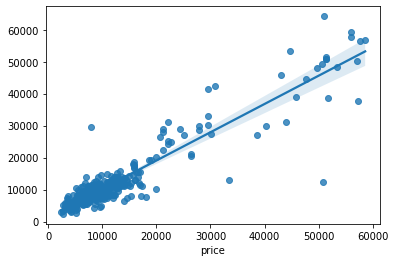

In [42]:
# plotting regplot with y_test vs r_pred(randomForest predicted value)
sns.regplot(y_test,r_pred)

In [35]:
# LET'S TRAIN THE MODEL WITH SGDREGRESSOR

from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(x_train,y_train)
sgd_pred= sgd.predict(x_test)
print('r2_score=',r2_score(y_test, sgd_pred))
print('mean_absolute_error=',mean_absolute_error(y_test,sgd_pred))
print('mean_squared_error=',mean_squared_error(y_test,sgd_pred))


r2_score= 0.6969261333994615
mean_absolute_error= 3679.652860419554
mean_squared_error= 32858642.254139915


<AxesSubplot:xlabel='price'>

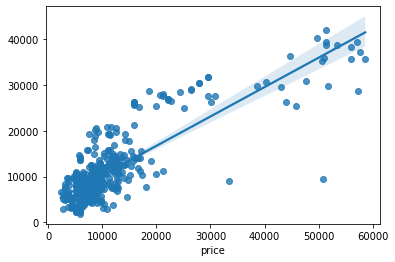

In [41]:
# plotting regression plot of predicted value of SGDRegressor 
sns.regplot(y_test,sgd_pred)

In [49]:
## LET'S TRAIN THE MODEL WITH ADABOOSTRegressor

from sklearn.ensemble import AdaBoostRegressor
AD = AdaBoostRegressor(n_estimators=280,learning_rate=0.01)
AD.fit(x_train,y_train)
AD_pred= AD.predict(x_test)
print('r2_score=',r2_score(y_test, AD_pred))
print('mean_absolute_error=',mean_absolute_error(y_test,AD_pred))
print('mean_squared_error=',mean_squared_error(y_test,AD_pred))


r2_score= 0.8402910122941272
mean_absolute_error= 2901.432113822011
mean_squared_error= 17315318.376542535


<AxesSubplot:xlabel='price'>

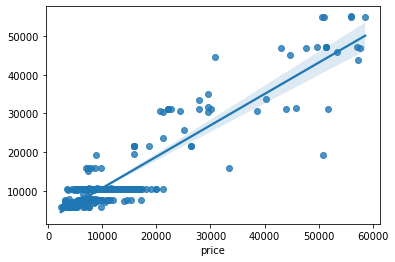

In [51]:
#
sns.regplot(y_test, AD_pred)

In [117]:
### LET'S TRAIN THE MODEL WITH GRADIENTBOOSTING Regressor

from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
GB_pred= GB.predict(x_test)
print('r2_score=',r2_score(y_test, GB_pred))
print('mean_absolute_error=',mean_absolute_error(y_test,GB_pred))
print('mean_squared_error=',mean_squared_error(y_test,GB_pred))


r2_score= 0.8250537388024314
mean_absolute_error= 2154.8091143267784
mean_squared_error= 12858247.302264411


<AxesSubplot:xlabel='price'>

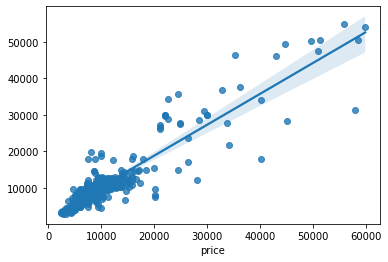

In [118]:
# plotting regplot of predicted value of GradientBoostingRegressor
sns.regplot(y_test, GB_pred)

**LET'S USE CROSS VALIDATION**

In [119]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold
kfold= KFold(n_splits=10, shuffle=True, random_state=9)

x_train,x_test,y_train,y_test= train_test_split(scaled,y, test_size=0.20, random_state=9)


AD = AdaBoostRegressor(n_estimators=280,learning_rate=0.01)
print('cross_validation_score with AdaBoost')
print(np.mean(cross_val_score(AD, x_train,y_train, cv=kfold)),'\n')


sgd = SGDRegressor()
print('cross_validation_score with SGDRegressor')
print(np.mean(cross_val_score(sgd, x_train,y_train, cv=kfold)),'\n')

GB = GradientBoostingRegressor()
print('cross_validation_score with GradienBoostingRegressor')
print(np.mean(cross_val_score(GB , x_train,y_train, cv=kfold)))


RF = RandomForestRegressor()
print('cross_validation_score with RandomForestRegressor')
print(np.mean(cross_val_score(RF , x_train,y_train, cv=kfold)))


cross_validation_score with AdaBoost
0.7702269486595775 

cross_validation_score with SGDRegressor
0.6313782836014061 

cross_validation_score with GradienBoostingRegressor
0.8222389873597675
cross_validation_score with RandomForestRegressor
0.8088454593285966


In [ ]:
* we get maximum cross_validation score of GradientBoosting & RandomForestRegressor
* so now use Hyperparapetemer tunning with these 

In [198]:
#  HYPERPARAMATER TUNING                  '''' RANDOMFOREST-Regressor''''
from sklearn.model_selection import GridSearchCV

G_RF = RandomForestRegressor()
param= {'n_estimators':[100,180, 280],'max_depth':[26,31,37,41,45] ,'min_samples_split':[2,3],
       'max_leaf_nodes':[15,21,29.32,37,41]}
gcv = GridSearchCV(RF ,param, cv=kfold,n_jobs=-1)

gcv.fit(x_train,y_train)
print('best_parameter=', gcv.best_params_ )


best_parameter= {'max_depth': 45, 'max_leaf_nodes': 41, 'min_samples_split': 3, 'n_estimators': 100}


In [208]:
G_RF = RandomForestRegressor(n_estimators=100 ,max_depth=41,max_leaf_nodes=37,min_samples_split=3)
G_RF.fit(x_train, y_train)
pred = G_RF.predict(x_test)

print('r2_score=',r2_score(y_test, pred))
print('mean_absolute_error=',mean_absolute_error(y_test,pred))
print('mean_squared_error=',mean_squared_error(y_test,pred))


r2_score= 0.8627450003152312
mean_absolute_error= 2285.932908343705
mean_squared_error= 14880903.400946323


In [18]:
#  HYPERPARAMATER TUNING  with          '''' GRADIENTBOOSTING-Regressor''''
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingRegressor
gb= GradientBoostingRegressor()
param= {'n_estimators':[100,220],'max_depth':[3,5,6,7,8] ,'learning_rate':[0.1,0.01,0.039,0.29],
        'loss':['squared_error','absolute_error','quantile'],'criterion':['friedman_mse', 'squared_error', 'mse']}
GR = GridSearchCV(gb ,param, cv=kfold,n_jobs=-1)

GR.fit(x_train,y_train)
print('best_parameter=', GR.best_params_ )


best_parameter= {'criterion': 'squared_error', 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'n_estimators': 220}


In [24]:
grid_gb = GradientBoostingRegressor(n_estimators=220,criterion='squared_error' ,max_depth=3,learning_rate=0.1)
grid_gb.fit(x_train, y_train)
pred1 = grid_gb.predict(x_test)

print('r2_score=',r2_score(y_test, pred1))
print('mean_absolute_error=',mean_absolute_error(y_test,pred1))
print('mean_squared_error=',mean_squared_error(y_test,pred1))


r2_score= 0.8772520582788569
mean_absolute_error= 2109.4946721207175
mean_squared_error= 13308078.158263383


<AxesSubplot:xlabel='price'>

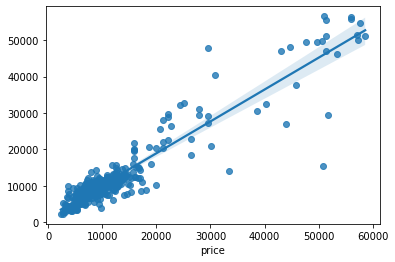

In [25]:
# 
sns.regplot(y_test, pred1)

In [ ]:
#  SAVE THE HYPERTUNNED GRDIENTBOOSTING MODEL 

In [26]:
import pickle

flight_fare = 'flight_fare.pickle'

pickle.dump(grid_gb,open(flight_fare, 'wb'))



**CONCLUSION**
* we get important information from visualization to which Flight fare price has highest in 
  each journey
* we visualize barplot using groupby method with (departure_airport, arival_airport,FLight_name) 
  then we get best information about relationship of these attributes. If we doesn't use 
  visualization on this dataset then some information was such type of that we don't 
  understand it without visualization
* In EDA data Visualization power is most important point to we get information in understandable way